# Chapter xx

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [83]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    return filename
    
# download('https://github.com/AllenDowney/DSIRP/raw/main/utils.py')

[Click here to run this chapter on Colab](https://colab.research.google.com/github/AllenDowney/DSIRP/blob/main/chapters/chap01.ipynb)

[documentation of os.times](https://docs.python.org/3/library/os.html#os.times)

In [2]:
import os

def etime():
    """Measures user and system time this process has used.

    Returns the sum of user and system time."""
    user, sys, chuser, chsys, real = os.times()
    return user+sys

In [4]:
start = etime()
t = [x**2 for x in range(10000)]
end = etime()
end - start

0.010000000000000009

In [3]:
from time import sleep

start = etime()
sleep(1)
end = etime()
end - start

0.0

In [10]:
def time_func(func, n):
    """Run a function and return the elapsed time.

    func: function
    n: problem size

    returns: user+sys time in seconds
    """
    start = etime()
    func(n)
    end = etime()
    elapsed = end - start
    return elapsed

In [11]:
def list_append(n):
    t = []
    [t.append(x) for x in range(n)]

In [12]:
%timeit list_append(10000)

522 µs ± 900 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
time_func(list_append, 10000)

0.0

In [14]:
time_func(list_append, 100000)

0.009999999999999787

In [15]:
time_func(list_append, 1000000)

0.07000000000000028

In [16]:
time_func(list_append, 10000000)

0.6399999999999988

In [17]:
def run_timing_test(func, max_time=1):
    """Tests the given function with a range of values for n.

    func: function object

    returns: list of ns and a list of run times.
    """
    ns = []
    ts = []
    for i in range(10, 28):
        n = 2**i
        t = time_func(func, n)
        print(n, t)
        if t > 0:
            ns.append(n)
            ts.append(t)
        if t > max_time:
            break

    return ns, ts

In [18]:
ns, ts = run_timing_test(list_append)

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.010000000000001563
65536 0.0
131072 0.009999999999999787
262144 0.02000000000000135
524288 0.03999999999999915
1048576 0.07000000000000028
2097152 0.1399999999999988
4194304 0.29999999999999893
8388608 0.5600000000000023
16777216 1.0599999999999987


In [19]:
def fit(ns, ts, exp=1.0, index=-1):
    """Fits a curve with the given exponent.

    ns: sequence of problem sizes
    ts: sequence of times
    exp: exponent of the fitted curve
    index: index of the element the fitted line should go through

    returns: sequence of fitted times


    """
    # Use the element with the given index as a reference point,
    # and scale all other points accordingly.
    nref = ns[index]
    tref = ts[index]

    tfit = []
    for n in ns:
        ratio = n / nref
        t = ratio**exp * tref
        tfit.append(t)

    return tfit

In [22]:
ts_fit = fit(ns, ts)
ts_fit

[0.0020703124999999975,
 0.00828124999999999,
 0.01656249999999998,
 0.03312499999999996,
 0.06624999999999992,
 0.13249999999999984,
 0.2649999999999997,
 0.5299999999999994,
 1.0599999999999987]

In [23]:
import matplotlib.pyplot as plt

def plot_timing_test(ns, ts, label='', color='C0', exp=1.0, scale='log'):
    """Plots data and a fitted curve.

    ns: sequence of n (problem size)
    ts: sequence of t (run time)
    label: string label for the data curve
    color: string color for the data curve
    exp: exponent (slope) for the fitted curve
    scale: string passed to xscale and yscale
    """
    ts_fit = fit(ns, ts, exp)
    fit_label = 'exp = %d' % exp
    plt.plot(ns, ts_fit, label=fit_label, color='0.7', linestyle='dashed')
    plt.plot(ns, ts, 'o-', label=label, color=color, alpha=0.7)
    plt.xlabel('Problem size (n)')
    plt.ylabel('Runtime (seconds)')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.legend()

In [ ]:
plot_timing_test(ns, ts, scale='linear')
plt.title('list append')

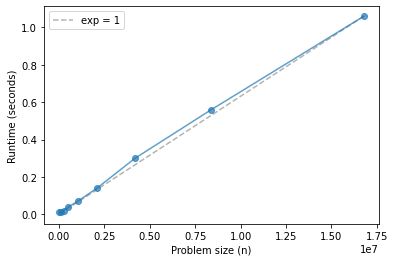

In [25]:
plot_timing_test(ns, ts, scale='log')
plt.title('list append')

In [28]:
def list_pop(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.pop() for _ in range(n)]

ns, ts = run_timing_test(list_pop)

plot_timing_test(ns, ts, scale='log')
plt.title('list pop');

In [31]:
def list_pop0(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.pop(0) for _ in range(n)]

ns, ts = run_timing_test(list_pop0)

plot_timing_test(ns, ts, scale='log', exp=2)
plt.title('list pop(0)');

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.010000000000005116
32768 0.0
65536 0.00999999999999801
131072 0.020000000000003126
262144 0.02999999999999403
524288 0.07000000000000028
1048576 0.11999999999999744
2097152 0.25
4194304 0.5600000000000023
8388608 1.0500000000000043


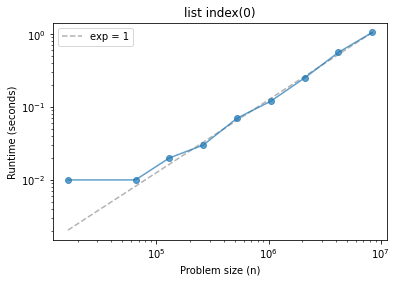

In [46]:
def list_index0(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.index(0) for _ in range(n)]

ns, ts = run_timing_test(list_index0)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('list index(0)');

1024 0.00999999999999801
2048 0.03999999999999915
4096 0.14999999999999858
8192 0.5700000000000003
16384 2.260000000000005


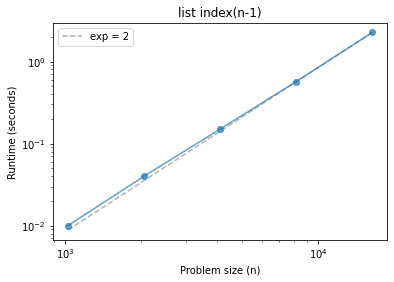

In [47]:
def list_index_n(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.index(n-1) for _ in range(n)]

ns, ts = run_timing_test(list_index_n)

plot_timing_test(ns, ts, scale='log', exp=2)
plt.title('list index(n-1)');

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.0
65536 0.00999999999999801
131072 0.010000000000005116
262144 0.02999999999999403
524288 0.05000000000000426
1048576 0.09999999999999432
2097152 0.23000000000000398
4194304 0.46999999999999886
8388608 0.9699999999999989
16777216 1.8300000000000054


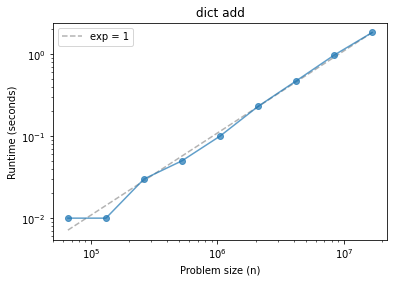

In [50]:
def dict_add(n):
    d = {}
    [d.setdefault(x, x) for x in range(n)]

ns, ts = run_timing_test(dict_add)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('dict add');

1024 0.0
2048 0.0
4096 0.010000000000005116
8192 0.0
16384 0.0
32768 0.0
65536 0.00999999999999801
131072 0.020000000000003126
262144 0.03999999999999915
524288 0.0799999999999983
1048576 0.1600000000000037
2097152 0.3299999999999983
4194304 0.6599999999999966
8388608 1.3700000000000045


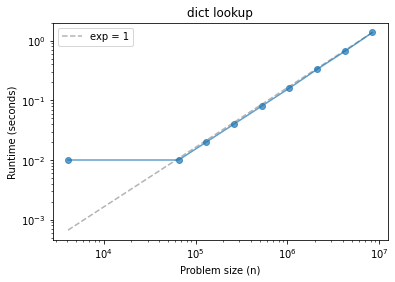

In [52]:
def dict_lookup(n):
    d = {}
    [d.setdefault(x, x) for x in range(n)]
    [d[x] for x in range(n)]

ns, ts = run_timing_test(dict_lookup)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('dict lookup');